# I. Prepare data

**[1.1]** Create a df to store the csv file paths

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
import pandas as pd

def gather_file_paths(root_folder):
    file_paths = []
    
    # Walk through the directory
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image (you can add more extensions as needed)
            if file.lower().endswith(('.csv')):
                # Create the full path to the image
                full_path = os.path.join(subdir, file)
                file_paths.append(full_path)
                
    return file_paths

In [4]:
root_folder = '/kaggle/input/itineraries'
csv_paths = gather_file_paths(root_folder)

# Create a DataFrame
df_csv = pd.DataFrame(csv_paths, columns=['csv_path'])

In [7]:
sample_df=pd.read_csv(df_csv['csv_path'].iloc[0])

In [10]:
df_csv['csv_path'].iloc[0]

'/kaggle/input/itineraries/PHL/PHL_itineraries_ul.csv'

In [12]:
sample_df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [13]:
df_csv.head()

,csv_path
0,/kaggle/input/itineraries/PHL/PHL_itineraries_...
1,/kaggle/input/itineraries/PHL/PHL_itineraries_...
2,/kaggle/input/itineraries/PHL/PHL_itineraries_...
3,/kaggle/input/itineraries/PHL/PHL_itineraries_...
4,/kaggle/input/itineraries/PHL/PHL_itineraries_...


**[1.2]** Combine all csv files to create a dataframe

In [14]:
# Initialize an empty list to store DataFrames
dataframes = []

# oop through each file path in df_csv and read the CSV files
for file_path in df_csv['csv_path']:
    df = pd.read_csv(file_path)  # Read the CSV file
    dataframes.append(df)        # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
df= pd.concat(dataframes, ignore_index=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 13519999 entries, 0 to 13519998

Data columns (total 23 columns):

 #   Column                             Dtype  

---  ------                             -----  

 0   legId                              object 

 1   searchDate                         object 

 2   flightDate                         object 

 3   startingAirport                    object 

 4   destinationAirport                 object 

 5   travelDuration                     object 

 6   isBasicEconomy                     bool   

 7   isRefundable                       bool   

 8   isNonStop                          bool   

 9   totalFare                          float64

 10  totalTravelDistance                float64

 11  segmentsDepartureTimeEpochSeconds  object 

 12  segmentsDepartureTimeRaw           object 

 13  segmentsArrivalTimeEpochSeconds    object 

 14  segmentsArrivalTimeRaw             object 

 15  segmentsArrivalAirportCode         object 



**[1.3]** Save the dataframe

In [18]:
# Save the DataFrame to a pickle file
pickle_file_path = 'itineraries.pkl'  # Specify the file path for the pickle file
df.to_pickle(pickle_file_path)

# II.  Data cleaning

**[2.1]** Reload the data

In [2]:
import pickle
import pandas as pd
df = pd.read_pickle('/kaggle/input/itineraries/itineraries.pkl')

**[2.2]** Display the summary statistics of the dataset

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
legId,13519999,1721518,ad0cccaf7911a955716eb90254547ac4,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
searchDate,13519999,32,2022-05-02,540011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flightDate,13519999,92,2022-05-24,285643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startingAirport,13519999,16,LAX,1352275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destinationAirport,13519999,16,LAX,1295126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travelDuration,13519999,1836,PT1H25M,53758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isBasicEconomy,13519999,2,False,12768661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isRefundable,13519999,2,False,13519808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isNonStop,13519999,2,False,9564064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totalFare,13519999.0,NaN,NaN,NaN,373.753516,207.549594,23.97,223.58,344.6,487.6,8260.61


**[2.3]** Create a dataframe name *df_selected* for selected columns and perform preprocessing

In [3]:
df_selected=df[['startingAirport', 
    'destinationAirport', 
    'flightDate', 
    'segmentsDepartureTimeRaw', 
    'segmentsCabinCode','totalFare','isRefundable','isNonStop','isBasicEconomy']]

In [3]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   startingAirport           object 
 1   destinationAirport        object 
 2   flightDate                object 
 3   segmentsDepartureTimeRaw  object 
 4   segmentsCabinCode         object 
 5   totalFare                 float64
 6   isRefundable              bool   
 7   isNonStop                 bool   
 8   isBasicEconomy            bool   
dtypes: bool(3), float64(1), object(5)
memory usage: 657.6+ MB


In [5]:
df_selected.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
startingAirport,13519999,16,LAX,1352275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destinationAirport,13519999,16,LAX,1295126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flightDate,13519999,92,2022-05-24,285643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segmentsDepartureTimeRaw,13519999,1374911,2022-05-18T06:00:00.000-04:00,1599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segmentsCabinCode,13519999,52,coach||coach,8528140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totalFare,13519999.0,NaN,NaN,NaN,373.753516,207.549594,23.97,223.58,344.6,487.6,8260.61
isRefundable,13519999,2,False,13519808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isNonStop,13519999,2,False,9564064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isBasicEconomy,13519999,2,False,12768661,NaN,NaN,NaN,NaN,NaN,NaN,NaN


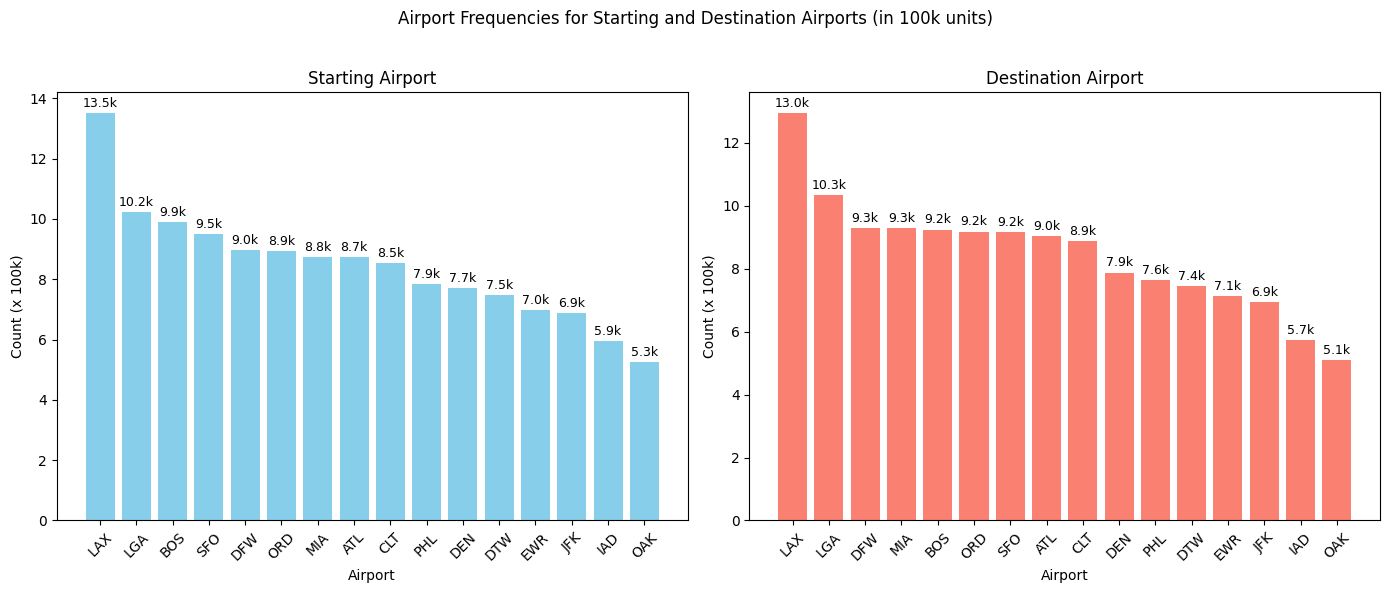

In [7]:
import matplotlib.pyplot as plt

# Select the relevant columns
df_airport= df_selected[['startingAirport', 'destinationAirport']]

# Get the value counts for each airport column
starting_counts = df_airport['startingAirport'].value_counts()
destination_counts = df_airport['destinationAirport'].value_counts()

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Airport Frequencies for Starting and Destination Airports (in 100k units)')

# Plot for starting airport
axes[0].bar(starting_counts.index, starting_counts.values / 100000, color='skyblue')
axes[0].set_title('Starting Airport')
axes[0].set_xlabel('Airport')
axes[0].set_ylabel('Count (x 100k)')
axes[0].tick_params(axis='x', rotation=45)

# Display value counts on top of each bar with unit adjustment
for i, v in enumerate(starting_counts.values):
    axes[0].text(i, (v / 100000) + 0.1, f"{v / 100000:.1f}k", 
                 ha='center', va='bottom', fontsize=9)

# Plot for destination airport
axes[1].bar(destination_counts.index, destination_counts.values / 100000, color='salmon')
axes[1].set_title('Destination Airport')
axes[1].set_xlabel('Airport')
axes[1].set_ylabel('Count (x 100k)')
axes[1].tick_params(axis='x', rotation=45)

# Display value counts on top of each bar with unit adjustment
for i, v in enumerate(destination_counts.values):
    axes[1].text(i, (v / 100000) + 0.1, f"{v / 100000:.1f}k", 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

- Los Angeles International Airport (LAX) is the most frequent starting and destination airport, highlighting its role as a major hub in the dataset. Similarly, airports like LaGuardia (LGA), Dallas/Fort Worth (DFW), Miami (MIA), Boston Logan (BOS), and Chicago O'Hare (ORD) are also high traffic, frequently appearing as both starting points and destinations. 

- By contrast, airports like Washington Dulles (IAD) and Oakland (OAK) have lower counts, suggesting they play less central roles compared to top hubs like LAX and LGA

In [2]:
df_selected['isNonStop'].value_counts()

isNonStop
False    9564064
True     3955935
Name: count, dtype: int64

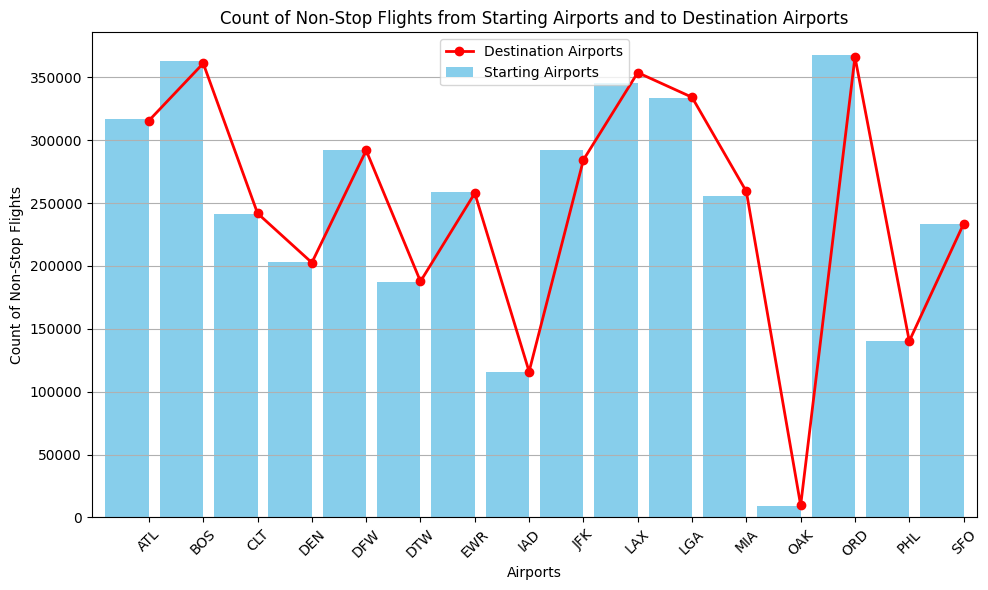

In [9]:
import matplotlib.pyplot as plt

# Count non-stop flights for each starting airport
non_stop_counts_starting = df_selected[df_selected['isNonStop'] == True].groupby('startingAirport').size()

# Count non-stop flights for each destination airport
non_stop_counts_destination = df_selected[df_selected['isNonStop'] == True].groupby('destinationAirport').size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for starting airports (bar graph)
non_stop_counts_starting.plot(kind='bar', ax=ax, color='skyblue', width=0.8, position=1, label='Starting Airports')

# Plot for destination airports (line graph)
non_stop_counts_destination.plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Destination Airports')

# Setting titles and labels
ax.set_title('Count of Non-Stop Flights from Starting Airports and to Destination Airports')
ax.set_xlabel('Airports')
ax.set_ylabel('Count of Non-Stop Flights')

# Rotate x-tick labels for better readability
ax.tick_params(axis='x', rotation=45)

# Add grid
ax.grid(axis='y')

# Adding a legend to distinguish between the bar and line graph
ax.legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [4]:
# Convert the specified columns to lists
df_selected['segmentsDepartureTimeRaw'] = df_selected['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||'))
df_selected['segmentsCabinCode'] = df_selected['segmentsCabinCode'].apply(lambda x: x.split('||'))

/tmp/ipykernel_30/790100329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['segmentsDepartureTimeRaw'] = df_selected['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||'))
/tmp/ipykernel_30/790100329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['segmentsCabinCode'] = df_selected['segmentsCabinCode'].apply(lambda x: x.split('||'))


In [5]:
df_selected['no_of_trip'] = df_selected['segmentsCabinCode'].apply(len)

/tmp/ipykernel_30/1191659397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['no_of_trip'] = df_selected['segmentsCabinCode'].apply(len)


In [7]:
import pandas as pd
from datetime import datetime

# Function to find the earliest timestamp and its index in a list
def find_earliest_timestamp_and_index(timestamps):
    if isinstance(timestamps, list) and len(timestamps) > 0:
        # Convert all timestamps to datetime objects
        datetime_objects = [datetime.fromisoformat(ts.replace('Z', '+00:00')) for ts in timestamps]
        # Find the earliest timestamp and its index
        earliest_index = datetime_objects.index(min(datetime_objects))
        earliest_timestamp = min(datetime_objects)
        return earliest_index, earliest_timestamp
    return None, None

# Create a column for the earliest departure timestamp and its index using .loc
df_selected.loc[:, 'earliest_departure_index'], df_selected.loc[:, 'earliest_departure'] = zip(
    *df_selected['segmentsDepartureTimeRaw'].apply(find_earliest_timestamp_and_index)
)

# Ensure earliest_departure is in datetime format and convert to UTC if necessary
df_selected['earliest_departure'] = pd.to_datetime(df_selected['earliest_departure'], utc=True)

# Create 'Departure Date' and 'Departure Time' columns
df_selected['Departure Date'] = df_selected['earliest_departure'].dt.date
df_selected['Departure Time'] = df_selected['earliest_departure'].dt.time

**[2.4]** Save the processed dataframe

In [6]:
df_selected.to_pickle('/kaggle/working/processed_ver2.pkl')

In [10]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the processed_ver2.pkl file
display(FileLink(r'processed_ver2.pkl'))

/kaggle/working/processed_ver2.pkl

**[2.5]** Reload the processed dataframe

In [1]:
import pandas as pd
df_selected=pd.read_pickle("/kaggle/input/itineraries/processed_ver2.pkl")

In [2]:
df_selected.head()

,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,totalFare,isRefundable,isNonStop,isBasicEconomy,no_of_trip,earliest_departure_index,earliest_departure,Departure Date,Departure Time
0,PHL,ATL,2022-06-14,[2022-06-14T20:55:00.000-04:00],[coach],42.79,False,True,False,1,0,2022-06-15 00:55:00+00:00,2022-06-15,00:55:00
1,PHL,ATL,2022-06-14,[2022-06-14T06:00:00.000-04:00],[coach],52.99,False,True,False,1,0,2022-06-14 10:00:00+00:00,2022-06-14,10:00:00
2,PHL,ATL,2022-06-14,[2022-06-14T21:38:00.000-04:00],[coach],52.99,False,True,False,1,0,2022-06-15 01:38:00+00:00,2022-06-15,01:38:00
3,PHL,ATL,2022-06-14,"[2022-06-14T05:45:00.000-04:00, 2022-06-14T12:...","[coach, coach]",87.06,False,False,False,2,0,2022-06-14 09:45:00+00:00,2022-06-14,09:45:00
4,PHL,ATL,2022-06-14,"[2022-06-14T21:30:00.000-04:00, 2022-06-15T06:...","[coach, coach]",89.59,False,False,False,2,0,2022-06-15 01:30:00+00:00,2022-06-15,01:30:00


In [3]:
df_selected.columns

Index(['startingAirport', 'destinationAirport', 'flightDate',
       'segmentsDepartureTimeRaw', 'segmentsCabinCode', 'totalFare',
       'isRefundable', 'isNonStop', 'isBasicEconomy', 'no_of_trip',
       'earliest_departure_index', 'earliest_departure', 'Departure Date',
       'Departure Time'],
      dtype='object')

In [2]:
# Convert the list-like column to strings for easier manipulation
df_selected['segmentsCabinCode'] = df_selected['segmentsCabinCode'].apply(lambda x: ','.join(x))

In [3]:
df_selected['premium_count'] = df_selected['segmentsCabinCode'].str.count('premium')

In [10]:
df_selected['premium_count'].value_counts()

premium_count
0    13487507
1       30304
2        2187
3           1
Name: count, dtype: int64

In [56]:
df_selected['startingAirport'].value_counts()

startingAirport
LAX    1352275
LGA    1021938
BOS     989175
SFO     949046
DFW     896596
ORD     894646
MIA     875288
ATL     874069
CLT     854536
PHL     785039
DEN     770429
DTW     747751
EWR     699628
JFK     688263
IAD     594215
OAK     527105
Name: count, dtype: int64

**[2.6]** Process the `Departure Time` column and perform encoding for categories columns

In [11]:
df_selected['Departure Time'] = pd.to_datetime(df_selected['Departure Time'], format='%H:%M:%S')

In [12]:
# Extract hour and minute
df_selected['Hour'] = df_selected['Departure Time'].dt.hour
df_selected['Minute'] = df_selected['Departure Time'].dt.minute

In [13]:
df_selected=df_selected.drop('Departure Time',axis=1)

In [4]:
df_selected['route'] = df_selected['startingAirport'] + '-' + df_selected['destinationAirport']

In [15]:
df_selected['route'].nunique()

235

In [18]:
df_selected[['route','premium_count','no_of_trip','isNonStop']]

,route,premium_count,no_of_trip,isNonStop
0,PHL-ATL,0,1,True
1,PHL-ATL,0,1,True
2,PHL-ATL,0,1,True
3,PHL-ATL,0,2,False
4,PHL-ATL,0,2,False
...,...,...,...,...
13519994,BOS-SFO,0,1,True
13519995,BOS-SFO,0,2,False
13519996,BOS-SFO,0,2,False
13519997,BOS-SFO,0,2,False


In [5]:
# Create a dictionary with 'route' as the key and 'no_of_trip' as the value
route_trip_dict = df_selected.groupby('route')['no_of_trip'].unique().apply(list).to_dict()

In [8]:
route_trip_dict['BOS-SFO']

[1, 2, 3]

In [6]:
import pickle
# Save the dictionary as a pickle file
with open('route_trip_dict.pkl', 'wb') as f:
    pickle.dump(route_trip_dict, f)

print("Dictionary saved as route_trip_dict.pkl")

Dictionary saved as route_trip_dict.pkl


In [7]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the route_trip_dict.pkl file
display(FileLink(r'route_trip_dict.pkl'))

/kaggle/working/route_trip_dict.pkl

In [23]:
# One-Hot_Encoding of categorical columns 
categorical_cols = ['destinationAirport','startingAirport']

df_processed = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=False)

In [24]:
df_processed.columns

Index(['flightDate', 'segmentsDepartureTimeRaw', 'segmentsCabinCode',
       'totalFare', 'isRefundable', 'isNonStop', 'isBasicEconomy',
       'no_of_trip', 'earliest_departure_index', 'earliest_departure',
       'Departure Date', 'premium_count', 'Hour', 'Minute', 'route',
       'destinationAirport_ATL', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_ATL', 'startingAirport_BOS', 'startingAirport_CLT',
       'startingAirport_DEN', 'startingAirport_DFW', 'startingAirport_DTW',
       'startingAirport_EWR', 'startingAirport_IAD', 'startingAirport_JFK',
       'startingAirport

In [25]:
df_processed['Departure Date'] = df_processed['Departure Date'].astype(str)
df_processed[['Year', 'Month', 'Day']] = df_processed['Departure Date'].str.split('-', expand=True)

# Convert to integers if needed
df_processed['Year'] = df_processed['Year'].astype(int)
df_processed['Month'] = df_processed['Month'].astype(int)
df_processed['Day'] = df_processed['Day'].astype(int)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
airport_encoder = LabelEncoder()

# List of columns to encode
airport_encoded_cols = [col for col in df_processed.columns if col.startswith(('destinationAirport_', 'startingAirport_'))]

# Apply Label Encoding
for col in airport_encoded_cols:
    df_processed[col] = airport_encoder.fit_transform(df_processed[col])

In [27]:
df_processed.columns

Index(['flightDate', 'segmentsDepartureTimeRaw', 'segmentsCabinCode',
       'totalFare', 'isRefundable', 'isNonStop', 'isBasicEconomy',
       'no_of_trip', 'earliest_departure_index', 'earliest_departure',
       'Departure Date', 'premium_count', 'Hour', 'Minute', 'route',
       'destinationAirport_ATL', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_ATL', 'startingAirport_BOS', 'startingAirport_CLT',
       'startingAirport_DEN', 'startingAirport_DFW', 'startingAirport_DTW',
       'startingAirport_EWR', 'startingAirport_IAD', 'startingAirport_JFK',
       'startingAirport

In [29]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 50 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   flightDate                object             
 1   segmentsDepartureTimeRaw  object             
 2   segmentsCabinCode         object             
 3   totalFare                 float64            
 4   isRefundable              bool               
 5   isNonStop                 bool               
 6   isBasicEconomy            bool               
 7   no_of_trip                int64              
 8   earliest_departure_index  int64              
 9   earliest_departure        datetime64[ns, UTC]
 10  Departure Date            object             
 11  premium_count             int64              
 12  Hour                      int32              
 13  Minute                    int32              
 14  route                     object             
 15  destinationAi

In [31]:
df_processed[['isRefundable','isNonStop','isBasicEconomy']] = df_processed[['isRefundable','isNonStop','isBasicEconomy']].astype(int)

In [32]:
df_processed[['Month', 'Day', 'Hour', 'Minute',
        'destinationAirport_ATL', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_ATL', 'startingAirport_BOS', 'startingAirport_CLT',
       'startingAirport_DEN', 'startingAirport_DFW', 'startingAirport_DTW',
       'startingAirport_EWR', 'startingAirport_IAD', 'startingAirport_JFK',
       'startingAirport_LAX', 'startingAirport_LGA', 'startingAirport_MIA',
       'startingAirport_OAK', 'startingAirport_ORD', 'startingAirport_PHL',
       'startingAirport_SFO','isRefundable','isNonStop','isBasicEconomy','no_of_trip','premium_count',
              'totalFare']].head()


,Month,Day,Hour,Minute,destinationAirport_ATL,destinationAirport_BOS,destinationAirport_CLT,destinationAirport_DEN,destinationAirport_DFW,destinationAirport_DTW,...,startingAirport_OAK,startingAirport_ORD,startingAirport_PHL,startingAirport_SFO,isRefundable,isNonStop,isBasicEconomy,no_of_trip,premium_count,totalFare
0,6,15,0,55,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,42.79
1,6,14,10,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,52.99
2,6,15,1,38,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,52.99
3,6,14,9,45,1,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,87.06
4,6,15,1,30,1,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,89.59


In [33]:
import pandas as pd


# Select the specific columns you want to save
columns_to_save = [
    'Month', 'Day', 'Hour', 'Minute',
        'destinationAirport_ATL', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_ATL', 'startingAirport_BOS', 'startingAirport_CLT',
       'startingAirport_DEN', 'startingAirport_DFW', 'startingAirport_DTW',
       'startingAirport_EWR', 'startingAirport_IAD', 'startingAirport_JFK',
       'startingAirport_LAX', 'startingAirport_LGA', 'startingAirport_MIA',
       'startingAirport_OAK', 'startingAirport_ORD', 'startingAirport_PHL',
       'startingAirport_SFO','isRefundable','isNonStop','isBasicEconomy','no_of_trip','premium_count',
              'totalFare'
]

# Create a new DataFrame with the selected columns
df_to_save = df_processed[columns_to_save]

# Save the DataFrame to a pickle file
df_to_save.to_pickle('df_selected_data.pkl')

print("DataFrame saved to df_selected_data.pkl")

DataFrame saved to df_selected_data.pkl


In [34]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the processed_ver2.pkl file
display(FileLink(r'df_selected_data.pkl'))

/kaggle/working/df_selected_data.pkl

**[2.7]** Pre-process the Target column: `totalFare`

In [1]:
# reload the data frame
import pandas as pd
df_cleaned=pd.read_pickle("/kaggle/input/itineraries/df_selected_data.pkl")

In [3]:
df_cleaned.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'destinationAirport_ATL',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destinationAirport_OAK',
       'destinationAirport_ORD', 'destinationAirport_PHL',
       'destinationAirport_SFO', 'startingAirport_ATL', 'startingAirport_BOS',
       'startingAirport_CLT', 'startingAirport_DEN', 'startingAirport_DFW',
       'startingAirport_DTW', 'startingAirport_EWR', 'startingAirport_IAD',
       'startingAirport_JFK', 'startingAirport_LAX', 'startingAirport_LGA',
       'startingAirport_MIA', 'startingAirport_OAK', 'startingAirport_ORD',
       'startingAirport_PHL', 'startingAirport_SFO', 'isRefundable',
       'isNonStop', 'isBasicEconomy', 'no_of_trip', 'premium_count',

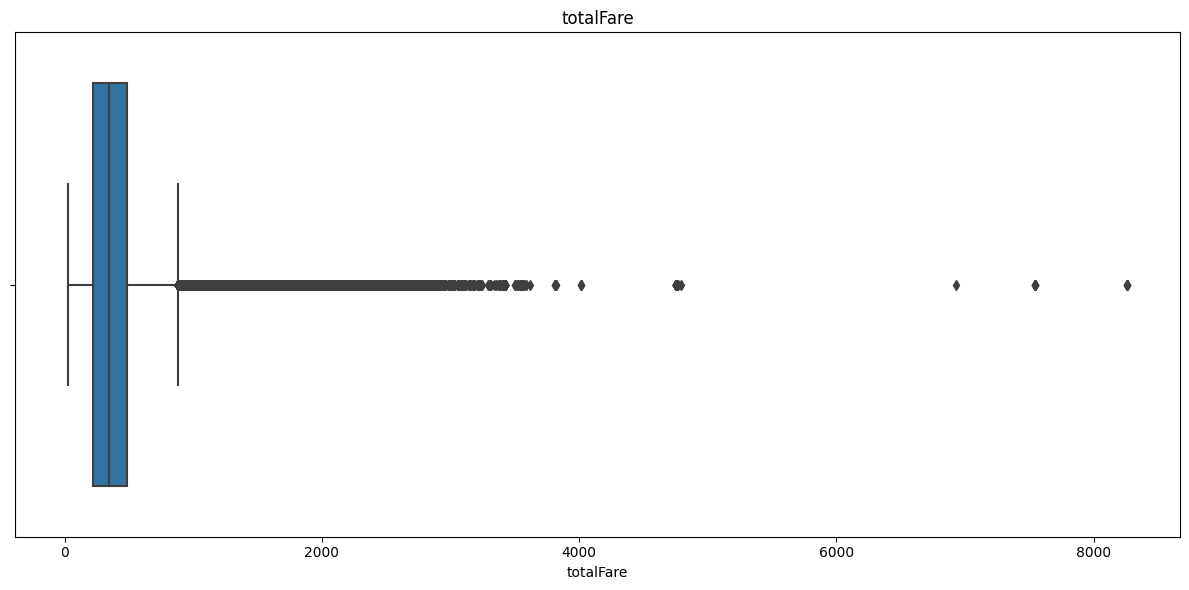

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the data with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['totalFare'])
plt.title('totalFare')
plt.xlabel('totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [4]:
# Summary statistics for totalFare column
totalFare_stats = df_cleaned['totalFare'].describe()
print(totalFare_stats)

count    1.352000e+07
mean     3.737535e+02
std      2.075496e+02
min      2.397000e+01
25%      2.235800e+02
50%      3.446000e+02
75%      4.876000e+02
max      8.260610e+03
Name: totalFare, dtype: float64


In [5]:
# Additional statistics to help identify outliers
mean = df_cleaned['totalFare'].mean()
std_dev = df_cleaned['totalFare'].std()
median = df_cleaned['totalFare'].median()
iqr = totalFare_stats['75%'] - totalFare_stats['25%']  # Interquartile range

# Display the calculated statistics
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Median: {median}")
print(f"Interquartile Range (IQR): {iqr}")

Mean: 373.75351641298226
Standard Deviation: 207.54959415397542
Median: 344.6
Interquartile Range (IQR): 264.02


In [6]:
# Define potential outlier thresholds based on IQR
lower_bound = totalFare_stats['25%'] - 1.5 * iqr
upper_bound = totalFare_stats['75%'] + 1.5 * iqr

print(f"\nPotential Outlier Thresholds:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Potential Outlier Thresholds:
Lower Bound: -172.44999999999996
Upper Bound: 883.63


***totalFare has a right-skewed distribution with significant variability. These factors suggest that while most trips have fares within a certain range, a small number of trips—possibly due to longer distances, premium services, or other factors—are priced much higher, influencing the overall average.***

In [2]:
import numpy as np
# Perform log transformation on the totalFare column
df_cleaned['log_totalFare']=np.log1p(df_cleaned['totalFare'])

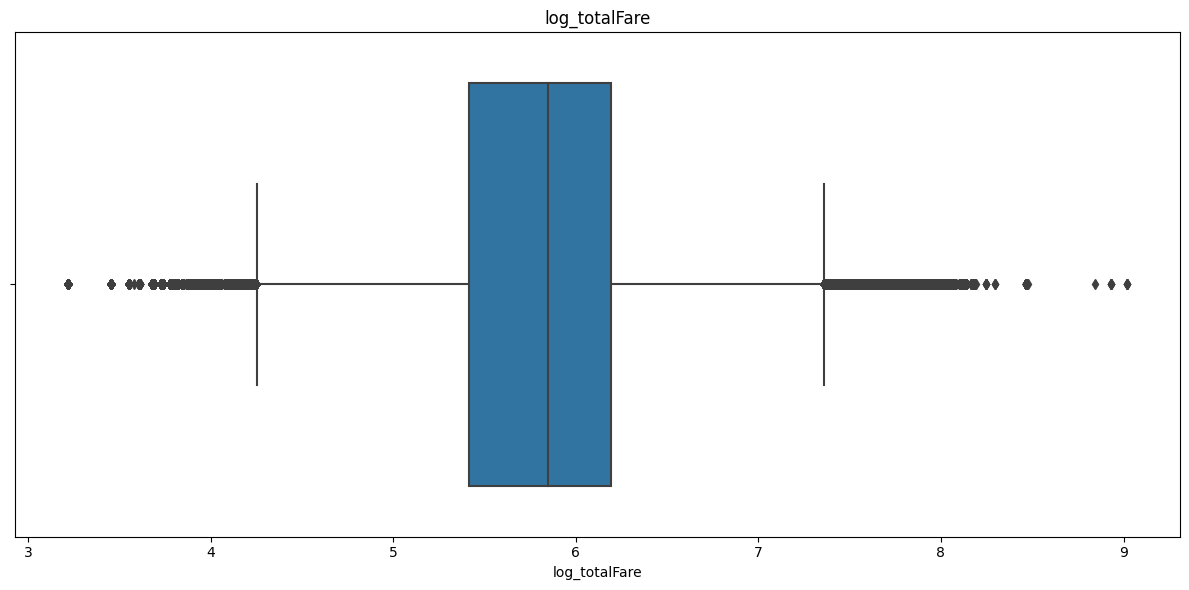

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the data with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['log_totalFare'])
plt.title('log_totalFare')
plt.xlabel('log_totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [3]:
# Calculate the IQR and identify outliers
Q1 = df_cleaned['log_totalFare'].quantile(0.25)
Q3 = df_cleaned['log_totalFare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_cleaned[(df_cleaned['log_totalFare'] < lower_bound) | (df_cleaned['log_totalFare'] > upper_bound)]

# Print the outliers
print("Outliers in log_totalFare:")
print(outliers[['log_totalFare']])

Outliers in log_totalFare:
          log_totalFare
0              3.779405
1              3.988799
2              3.988799
34             4.168214
35             4.168214
...                 ...
13519711       4.168214
13519712       4.168214
13519713       4.168214
13519714       4.168214
13519893       4.007151

[138163 rows x 1 columns]


Original number of rows: 13519999
Number of rows after removing outliers: 13381836


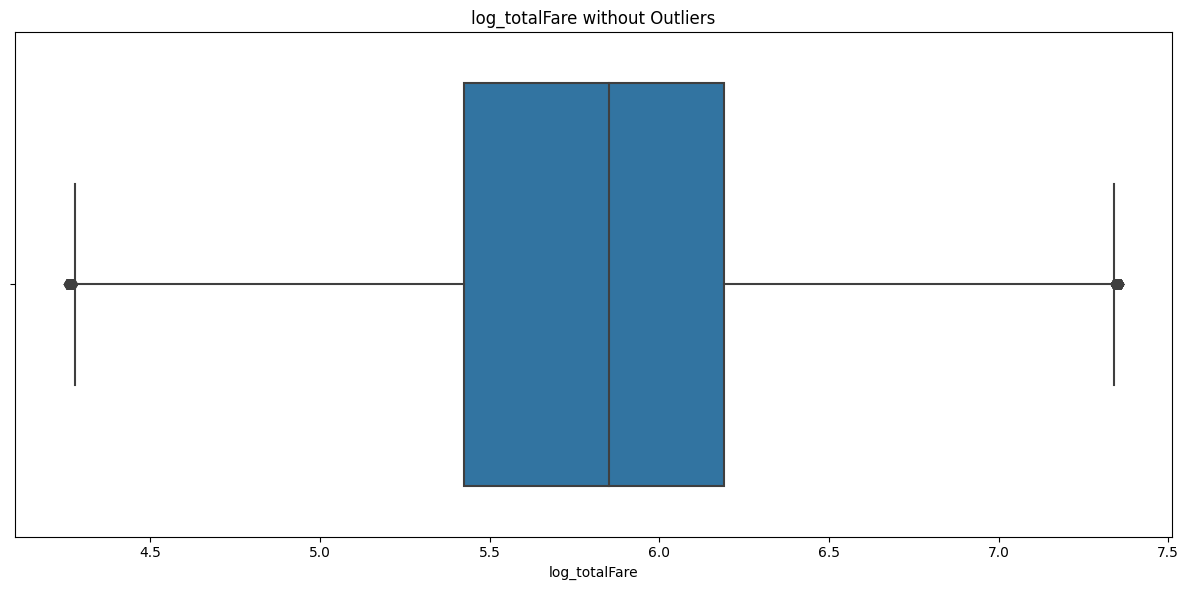

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter out the outliers
df_no_outliers = df_cleaned[(df_cleaned['log_totalFare'] >= lower_bound) & (df_cleaned['log_totalFare'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {df_cleaned.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")

# Visualize the data without outliers with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_no_outliers['log_totalFare'])
plt.title('log_totalFare without Outliers')
plt.xlabel('log_totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [11]:
df_no_outliers.head()

,Month,Day,Hour,Minute,destinationAirport_ATL,destinationAirport_BOS,destinationAirport_CLT,destinationAirport_DEN,destinationAirport_DFW,destinationAirport_DTW,...,startingAirport_ORD,startingAirport_PHL,startingAirport_SFO,isRefundable,isNonStop,isBasicEconomy,no_of_trip,premium_count,totalFare,log_totalFare
3,6,14,9,45,1,0,0,0,0,0,...,0,1,0,0,0,0,2,0,87.06,4.478018
4,6,15,1,30,1,0,0,0,0,0,...,0,1,0,0,0,0,2,0,89.59,4.506344
5,6,14,12,25,1,0,0,0,0,0,...,0,1,0,0,0,0,2,0,107.68,4.688408
6,6,14,18,30,1,0,0,0,0,0,...,0,1,0,0,0,0,2,0,117.96,4.778787
7,6,14,18,30,1,0,0,0,0,0,...,0,1,0,0,0,0,2,0,117.96,4.778787


In [12]:
df_no_outliers.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'destinationAirport_ATL',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destinationAirport_OAK',
       'destinationAirport_ORD', 'destinationAirport_PHL',
       'destinationAirport_SFO', 'startingAirport_ATL', 'startingAirport_BOS',
       'startingAirport_CLT', 'startingAirport_DEN', 'startingAirport_DFW',
       'startingAirport_DTW', 'startingAirport_EWR', 'startingAirport_IAD',
       'startingAirport_JFK', 'startingAirport_LAX', 'startingAirport_LGA',
       'startingAirport_MIA', 'startingAirport_OAK', 'startingAirport_ORD',
       'startingAirport_PHL', 'startingAirport_SFO', 'isRefundable',
       'isNonStop', 'isBasicEconomy', 'no_of_trip', 'premium_count',

# III. Prepare data for training

**[3.1]** Create a variable called X and extract the target variable into a variable called y

In [5]:
y = df_no_outliers['log_totalFare'].values.reshape(-1, 1)
X= df_no_outliers[['Month', 'Day', 'Hour', 'Minute', 'destinationAirport_ATL',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destinationAirport_OAK',
       'destinationAirport_ORD', 'destinationAirport_PHL',
       'destinationAirport_SFO', 'startingAirport_ATL', 'startingAirport_BOS',
       'startingAirport_CLT', 'startingAirport_DEN', 'startingAirport_DFW',
       'startingAirport_DTW', 'startingAirport_EWR', 'startingAirport_IAD',
       'startingAirport_JFK', 'startingAirport_LAX', 'startingAirport_LGA',
       'startingAirport_MIA', 'startingAirport_OAK', 'startingAirport_ORD',
       'startingAirport_PHL', 'startingAirport_SFO', 'isRefundable',
        'isBasicEconomy', 'no_of_trip', 'premium_count']]

In [96]:
len(X.columns)

40

**[3.2]** Save X and y variables to save memory

In [6]:
import pickle
# Specify the filename
filename = 'split_data_final_version.pkl'

# Save X and y to a pickle file
with open(filename, 'wb') as file:
    pickle.dump({'X': X, 'y': y}, file)

print(f'Data saved to {filename}')

Data saved to split_data_final_version.pkl


In [7]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'split_data_final_version.pkl'))

/kaggle/working/split_data_final_version.pkl

**[3.3]** Reload X and y for training

In [1]:
import pickle
filename = '/kaggle/input/itineraries/split_data_final_version.pkl'
# Load data from the pickle file
with open(filename, 'rb') as file:
    data = pickle.load(file)
    X = data['X']
    y = data['y']

print('Data loaded from pickle file.')

Data loaded from pickle file.


# IV. Correlation matrix

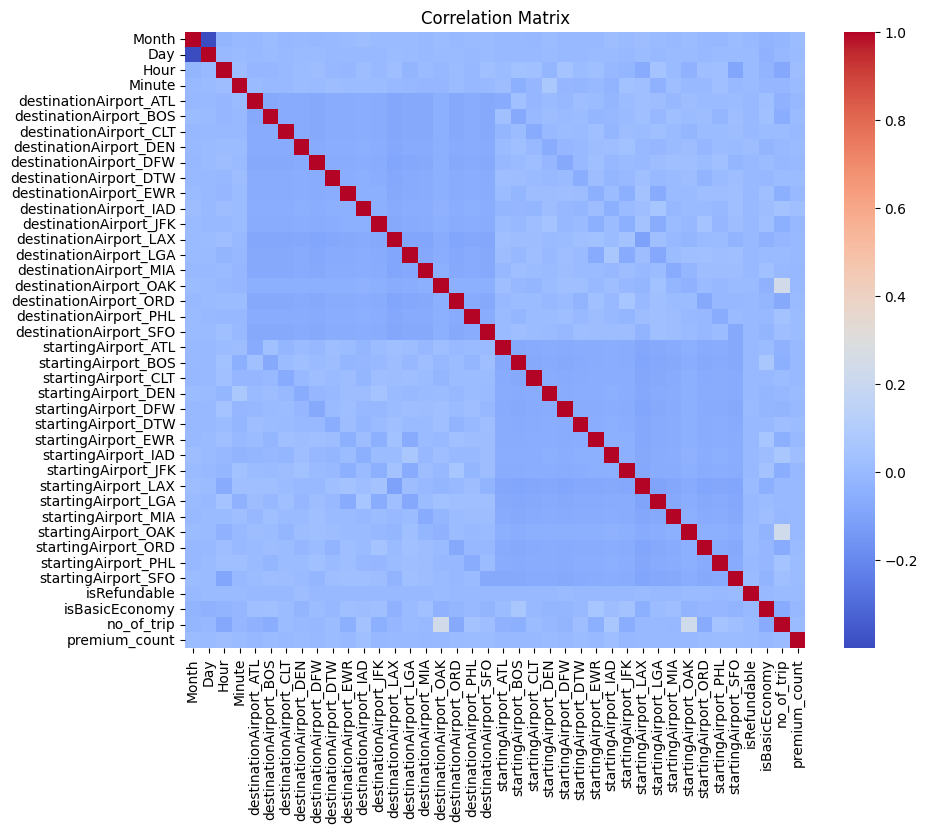

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# V. Data Splitting

**[5.1]** Split the features and target variable into 3 different sets with 60-20-20 ratio

In [3]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% train, 40% temp

# Split the temporary set into validation and test sets (50% of temp = 20% of original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# VI. Scale Data

In [4]:
# Import StandardScaler from Sklearn
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [6]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'scaler.pkl'))

/kaggle/working/scaler.pkl

# VII. Baseline model

**[7.1]** Find the mean of the target variable

In [7]:
y_mean = y_train.mean()

**[7.2]** Create a numpy array called y_base filled with the mean

In [8]:
import numpy as np
y_base = np.full(y_train.shape, y_mean)

**[7.3]** Import the Mean Square Error and Mean Absolute Error from sklearn

In [9]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**[7.4]** Display the MSE and MAE of this baseline model

In [10]:
print(mse(y_train, y_base, squared=True))
print(mae(y_train, y_base))

0.2820850273596535
0.43459737662635645


# VIII. Train LightGBM model with default parameters

**[8.1]** Instantiate the LightGBM class called reg with a random state=42

In [11]:
import lightgbm as lgb
# Initialize the LGBMRegressor model
reg = lgb.LGBMRegressor(objective='regression', random_state=42)

**[8.2]** Fit our model with the training data

In [12]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.491322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 40
[LightGBM] [Info] Start training from score 5.789650


LGBMRegressor(objective='regression', random_state=42)

In [13]:
import pickle

with open('lightgbm_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

print("Model saved successfully.")

Model saved successfully.


In [14]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'lightgbm_model.pkl'))

/kaggle/working/lightgbm_model.pkl

**[8.3]** Perform prediction on the training data

In [15]:
y_train_preds = reg.predict(X_train)

**[8.4]** Display the MSE and MAE scores on the training set

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [17]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

0.10506111560027041
0.24930400639222464


**[8.4]** Display the combine scatter plot and line chart to compare predictions against actuals for the training set

In [18]:
import altair as alt

In [19]:
import pandas as pd
y_train_preds=pd.DataFrame(y_train_preds)

In [20]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_totalFare"})

In [21]:
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df.rename(columns={0:'Actual Value'})

In [23]:
import pandas as pd
import altair as alt

# Sample data
y_train_sampled = y_train_df.sample(n=min(len(y_train_df), 2000), random_state=42)
y_train_preds_sampled = y_train_preds.sample(n=min(len(y_train_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_train_sampled['Actual Value'],
    'Predicted': y_train_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_train = min(data['Actual'].min(), data['Predicted'].min())
max_train = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_train, max_train])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_train, max_train])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_train, max_train],
    'y': [min_train, max_train]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()


alt.LayerChart(...)

In [24]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_train, y_train_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.6275551503613861


**[8.4]** Use the trained model to perform prediction on the validation set

In [25]:
y_val_preds = reg.predict(X_val)

In [26]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_val, y_val_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.627915674292032


**[8.5]** Display the MSE and MAE scores on the validation set

In [27]:
print(mse(y_val, y_val_preds, squared=True))
print(mae(y_val, y_val_preds))

0.10483523930491018
0.24902666208213733


**[8.6]** Display the combine scatter plot and line chart to compare predictions against actuals for the validation set

In [28]:
y_val_preds=pd.DataFrame(y_val_preds)
y_val_preds=y_val_preds.rename(columns={0:"TARGET_totalFare"})

In [29]:
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df.rename(columns={0:'Actual Value'})

In [30]:
import pandas as pd
import altair as alt

# Sample data
y_val_sampled = y_val_df.sample(n=min(len(y_val_df), 2000), random_state=42)
y_val_preds_sampled = y_val_preds.sample(n=min(len(y_val_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_val_sampled['Actual Value'],
    'Predicted': y_val_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_val = min(data['Actual'].min(), data['Predicted'].min())
max_val = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_val, max_val])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_val, max_val])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_val, max_val],
    'y': [min_val, max_val]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()


alt.LayerChart(...)

**[8.7]** Use the trained model to perform prediction on the testing set

In [31]:
y_test_preds = reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.6276197974297795


**[8.8]** Display the MSE and MAE scores on the testing set

In [33]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

0.10503124719066262
0.2493537892347424


**[8.9]** Display the combine scatter plot and line chart to compare predictions against actuals for the testing set

In [34]:
y_test_preds=pd.DataFrame(y_test_preds)
y_test_preds=y_test_preds.rename(columns={0:"TARGET_totalFare"})

In [46]:
y_test_df=pd.DataFrame(y_test)
y_test_df=y_test_df.rename(columns={0:'Actual Value'})

In [47]:
import pandas as pd
import altair as alt

# Sample data
y_test_sampled = y_test_df.sample(n=min(len(y_test_df), 2000), random_state=42)
y_test_preds_sampled = y_test_preds.sample(n=min(len(y_test_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_test_sampled['Actual Value'],
    'Predicted': y_test_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_test = min(data['Actual'].min(), data['Predicted'].min())
max_test = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_test, max_test])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_test, max_test])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_test, max_test],
    'y': [min_test, max_test]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()


alt.LayerChart(...)

**[8.10]** Import `LimeTabularExplainer` from `lime.lime_tabular`

In [43]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [48]:
from lime.lime_tabular import LimeTabularExplainer

**[8.11]** Create a `LimeTabularExplainer` with the training set and save it into a variable called `explainer`

In [49]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Training data as NumPy array
    mode='regression',            
    feature_names=X.columns,    # Feature names from the DataFrame
    verbose=True,
    random_state=42
)

**[8.12]** Analyse the first observation from the testing set with `lime_explainer` for the top value of the target variable

In [50]:
i = 0  # Index of the test instance
exp = explainer.explain_instance(X_test[i], reg.predict, num_features=10)

Intercept 5.629883352011415
Prediction_local [4.8312959]
Right: 5.398342314677554


**[8.13]** Display the results with `show_in_notebook`

In [51]:
# Show explanation in a notebook
exp.show_in_notebook(show_table=True, show_all=True)

# IX. Fine tune LightGBM model

**[9.1]** Import the BayesianOptimization from bayes_opt library

In [52]:
from bayes_opt import BayesianOptimization

**[9.2]** Perform hyperparameter fine-tuning using BayesianOptimization

In [53]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from bayes_opt import BayesianOptimization

# Define your objective function to optimize
def optimize_lightgbm(learning_rate, n_estimators, num_leaves, max_depth, subsample):
    learning_rate = float(learning_rate)
    n_estimators = int(n_estimators)
    num_leaves = int(num_leaves)
    max_depth = int(max_depth)
    subsample = float(subsample)

    # Create a LightGBM Regressor with the specified hyperparameters
    reg = lgb.LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        num_leaves=num_leaves,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Fit the model on the training data (using ravel to flatten y_train)
    reg.fit(X_train, y_train.ravel())

    # Predict on the validation data (using ravel to flatten y_val)
    y_pred = reg.predict(X_val)

    # Calculate the mean squared error on the validation data
    minus_mse = (-1) * mean_squared_error(y_val.ravel(), y_pred)

    return minus_mse

# Define the bounds for hyperparameter optimization
param_bounds = {
    'learning_rate': (0.01, 0.1),
    'n_estimators': (50, 300),
    'num_leaves': (20, 100),
    'max_depth': (3, 20),
    'subsample': (0.5, 1.0)
}

# Create a BayesianOptimization object
opt = BayesianOptimization(f=optimize_lightgbm, pbounds=param_bounds, random_state=42)

# Perform Bayesian optimization
opt.maximize(init_points=5, n_iter=10)

# Get the best set of hyperparameters
best_params = opt.max['params']

# Print the best hyperparameters and the corresponding MSE score
print("Best Hyperparameters:")
print(best_params)
print("\nBest MSE Score:")
print(-opt.max['target'])  # Convert back to positive MSE


|   iter    |  target   | learni... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.514574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 40
[LightGBM] [Info] Start training from score 5.789650
| 1         | -0.09323  | 0.04371   | 19.16     | 233.0     | 67.89     | 0.578     |
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.381797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 40
[LightGBM] [Info] Start training from score 5

**[9.2]** Instantiate the LightGBM class called reg with  with the best hyperparameters from the result of BayesianOptimization

In [68]:
import lightgbm as lgb
# Initialize the LGBMRegressor model
reg = lgb.LGBMRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    num_leaves=int(best_params['num_leaves']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    random_state=42
)

**[9.3]** Fit the model on the training set

In [69]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.212952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 40
[LightGBM] [Info] Start training from score 5.789650


LGBMRegressor(max_depth=20, n_estimators=198, num_leaves=87, random_state=42,
              subsample=0.5)

In [56]:
import pickle

with open('lightgbm_model_fine_tuned.pkl', 'wb') as file:
    pickle.dump(reg, file)

print("Model saved successfully.")

Model saved successfully.


In [57]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'lightgbm_model_fine_tuned.pkl'))

/kaggle/working/lightgbm_model_fine_tuned.pkl

**[9.4]** Perform prediction on the training data

In [70]:
y_train_preds = reg.predict(X_train)

**[9.5]** Display the MSE and MAE scores on the training set

In [59]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [71]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

0.08132745772454603
0.21677723144332792


**[9.6]** Display the combine scatter plot and line chart to compare predictions against actuals for the training set

In [61]:
import altair as alt

In [72]:
import pandas as pd
y_train_preds_df=pd.DataFrame(y_train_preds)

In [73]:
y_train_preds_df=y_train_preds_df.rename(columns={0:"TARGET_totalFare"})

In [74]:
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df.rename(columns={0:'Actual Value'})

In [76]:
import pandas as pd
import altair as alt

# Sample data
y_train_sampled = y_train_df.sample(n=min(len(y_train_df), 2000), random_state=42)
y_train_preds_sampled = y_train_preds_df.sample(n=min(len(y_train_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_train_sampled['Actual Value'],
    'Predicted': y_train_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_train = min(data['Actual'].min(), data['Predicted'].min())
max_train = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_train, max_train])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_train, max_train])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_train, max_train],
    'y': [min_train, max_train]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()

alt.LayerChart(...)

In [78]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_train, y_train_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.7116916892549034


**[9.7]** Perform prediction on the validation set

In [79]:
y_val_preds_df = reg.predict(X_val)

In [80]:
y_val_preds_df=pd.DataFrame(y_val_preds_df)

In [81]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_val, y_val_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.627915674292032


**[9.8]** Display the MSE and MAE scores on the validation set

In [82]:
print(mse(y_val, y_val_preds, squared=True))
print(mae(y_val, y_val_preds))

0.10483523930491018
0.24902666208213733


**[9.9]** Display the combine scatter plot and line chart to compare predictions against actuals for the validation set

In [83]:
y_val_preds_df=y_val_preds_df.rename(columns={0:"TARGET_totalFare"})

In [84]:
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df.rename(columns={0:'Actual Value'})

In [85]:
import pandas as pd
import altair as alt

# Sample data
y_val_sampled = y_val_df.sample(n=min(len(y_val_df), 2000), random_state=42)
y_val_preds_sampled = y_val_preds_df.sample(n=min(len(y_val_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_val_sampled['Actual Value'],
    'Predicted': y_val_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_val = min(data['Actual'].min(), data['Predicted'].min())
max_val = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_val, max_val])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_val, max_val])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_val, max_val],
    'y': [min_val, max_val]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()

alt.LayerChart(...)

**[9.10]** Perform prediction on the testing set

In [86]:
y_test_preds = reg.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.7116725567142381


**[9.11]** Display the MSE and MAE scores on the testing set

In [88]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

0.08132384793439176
0.216812663239491


**[9.12]** Display the combine scatter plot and line chart to compare predictions against actuals for the testing set

In [89]:
y_test_df=pd.DataFrame(y_test)
y_test_df=y_test_df.rename(columns={0:'Actual Value'})

In [90]:
y_test_preds_df=pd.DataFrame(y_test_preds)
y_test_preds_df=y_test_preds_df.rename(columns={0:'TARGET_totalFare'})

In [91]:
import pandas as pd
import altair as alt

# Sample data
y_test_sampled = y_test_df.sample(n=min(len(y_test_df), 2000), random_state=42)
y_test_preds_sampled = y_test_preds_df.sample(n=min(len(y_test_preds), 2000), random_state=42)

# Create a combined DataFrame for plotting
data = pd.DataFrame({
    'Actual': y_test_sampled['Actual Value'],
    'Predicted': y_test_preds_sampled['TARGET_totalFare']
})

# Find the min and max values to set axis limits based on the data itself
min_test = min(data['Actual'].min(), data['Predicted'].min())
max_test = max(data['Actual'].max(), data['Predicted'].max())

# Create the Altair chart
chart = alt.Chart(data).mark_point(color='red', opacity=0.6).encode(
    x=alt.X('Actual:Q', title='Actual', scale=alt.Scale(domain=[min_test, max_test])),
    y=alt.Y('Predicted:Q', title='Predicted', scale=alt.Scale(domain=[min_test, max_test])),
    tooltip=['Actual', 'Predicted']
)

# Add the identity line
identity_line = alt.Chart(pd.DataFrame({
    'x': [min_test, max_test],
    'y': [min_test, max_test]
})).mark_line(color='green').encode(
    x='x:Q',
    y='y:Q'
)

# Combine the scatter plot and the identity line
final_chart = chart + identity_line

# Set the size of the chart to make it smaller
final_chart = final_chart.properties(
    title='Actual vs Predicted',
    width=600,  # Adjust the width here
    height=800  # Adjust the height here
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
final_chart.show()

alt.LayerChart(...)

In [81]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'test_fined_tune.png'))

/kaggle/working/test_fined_tune.png

**[9.13]** Create a `LimeTabularExplainer` with the training set and save it into a variable called `explainer`

In [92]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Training data as NumPy array
    mode='regression',
    feature_names=X.columns,    # Feature names from the DataFrame
    verbose=True,
    random_state=42
)

**[9.14]** Analyse the first observation from the testing set with `lime_explainer` for the top value of the target variable

In [93]:
i = 0  # Index of the test instance
exp = explainer.explain_instance(X_test[i], reg.predict, num_features=10)

Intercept 5.448107725063427
Prediction_local [5.03295225]
Right: 5.5911866264848165


**[9.15]** Display the results with `show_in_notebook`

In [94]:
# Show explanation in a notebook
exp.show_in_notebook(show_table=True, show_all=True)